# This is the Copy for code 
13:15 06/25/24

read the data from nist... file   
    problem may come up: can't read the data    
                         can't related the data with colunm      
                         type error     
  
    
mapping wafer    
    pro: how to mapping?    
         how to do sth like circle backgrond     
         
goal 1:
    for each pixel which pad them go

goal 2:
    for neighbor pad which pixel they go

    

paper(more like backgroud introduction) or pdf 
    Fig 17
        circle
        cross (focus point)
        dark point

Airy disk

crosstalk

​
Yifu Chen
​
https://arxiv.org/pdf/1403.4302

We talked about Figure 17, and crosstalk.

https://en.wikipedia.org/wiki/Airy_disk

https://webbtelescope.org/contents/media/images/01G529MX46J7AFK61GAMSHKSSN

In [ ]:
#This will be the program first use histogram  and then mapping the wafer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Read the data
data = pd.read_csv('nist_so_mf_detector_array_padinfo.csv')

#get columns vaule about pixel positon
pixel_x_center = data['Pixel X center']
pixel_y_center = data['Pixel Y center']

# try use same method above by Pad X center,Pad Y center
pad_x_center = data['Pad X center']
pad_y_center = data['Pad Y center']

pad_x_center_A = []
pad_y_center_A = []
PXCB = []
PYCB = []
PXCC = []
PYCC = []


for i in range(len(data)):
    
    if data['Group Section'][i] == 'A':
        
        pad_x_center_A.append(int(data['Pad X center'][i]))
        pad_y_center_A.append(int(data['Pad Y center'][i]))
    
    if data['Group Section'][i] == 'B':
        
        PXCB.append(int(data['Pad X center'][i]))
        PYCB.append(int(data['Pad Y center'][i]))

    if data['Group Section'][i] == 'C':
        
        PXCC.append(int(data['Pad X center'][i]))
        PYCC.append(int(data['Pad Y center'][i]))


#pad_x_center = pad_x_center[100:150] #The code see how pad positon data goes
#pad_y_center = pad_y_center[100:150]


#histogram
#plt.hist2d(pixel_x_center, pixel_y_center, bins = (100,100), norm=colors.LogNorm())
plt.scatter(pixel_x_center, pixel_y_center, c='r', marker='o')
plt.scatter(pad_x_center_A, pad_y_center_A, c='b', marker='.')
plt.scatter(PXCB, PYCB, c='g', marker='.')
plt.scatter(PXCC, PYCC, c='k', marker='.')
#colors.LogNorm() normalize a given value to the 0-1 range on a log scale to show the log scale
# use norm to emphasize the exist value 

plt.show()

#this plot show the wafer location in the plot

In [ ]:
""" You can ignore the code below it is same function as the cell below

    this part of code will help me understand to achieve goal 1 of the project
    try to re-group the data by pixel x and pixel y
    to show what is right number of distance I should look for
"""

# data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
# data_goal1 = np.array(data_goal1).tolist()

# #get unique pixel x 
# unique_pixel_x = np.unique(pixel_x_center)

# distance_goal1 = []
# #first group the data by pixel x save to group_data
# #and then group the data by pixel y
# #and then calculate the distance to the pad

# #group_data = []
# group_data_y = []
# number_of_distance = []

# for j in range(len(unique_pixel_x)):    
    
#     group_same_x = []    

#     #first group the data by pixel x
#     for i in range(len(data)):
#         if pixel_x_center[i] == unique_pixel_x[j]:
#             group_same_x.append(data_goal1[i])

#     # get pixel y position from group_data
#     group_same_x = np.array(group_same_x)
#     y_pixel_in_group = group_same_x[:,1]
#     unique_pixel_y = np.unique(y_pixel_in_group)   
#     for k in range(len(unique_pixel_y)):

#         group_same_y = []
#         for i in range(len(group_same_x)):
#             if y_pixel_in_group[i] == unique_pixel_y[k]:
#                 #group the data by same pixel y   
#                 group_same_y.append(group_same_x[i])
#                 group_data_y.append(group_same_x[i])
        
#         length_group_y = len(group_same_y)
#         number = 0
#         #calculate the distance between pad for one group
#         for i in range(length_group_y ):
#             number += 1
#         number_of_distance.append(number)
        
    
# path_filename = '.\data\same pixel x and y data'    
# # Save data to CSV
# regroup_data = np.array(group_data_y)
# data_RG = np.column_stack((regroup_data[:,0],regroup_data[:,1],regroup_data[:,2],regroup_data[:,3])) 
# # the data for number_per_bin
# df = pd.DataFrame(data_RG,columns=['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center'])
# df.to_csv(f'{path_filename}.csv', index=False)

# reshape_number_of_distance = np.reshape(number_of_distance,(1,len(number_of_distance)))
# reshape_number_of_distance = np.array(reshape_number_of_distance)   
# data_ND = np.column_stack((reshape_number_of_distance))
# df2 = pd.DataFrame(data_ND,columns=[f'Sum of ND is {np.sum(number_of_distance)}']) 
# df2.to_csv('.\data\distance num for goal1.csv', index=False)  




In [ ]:
""" 
this part of code is the goal 1 of the project
    calculate the data for each pixel the distance to the related pad
    histogram of the data
"""

data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
data_goal1 = np.array(data_goal1).tolist()

#get unique pixel x 
unique_pixel_x = np.unique(pixel_x_center)

distance_goal1 = []
#first group the data by pixel x save to group_data
#and then group the data by pixel y
#and then calculate the distance to the pad

#number_of_distance = []

for j in range(len(unique_pixel_x)):
    group_data = []
    
    
    #first group the data by pixel x
    for i in range(len(data)):
        if pixel_x_center[i] == unique_pixel_x[j]:
            group_data.append(data_goal1[i])

    # get pixel y position from group_data
    group_data = np.array(group_data)
    y_pixel_in_group = group_data[:,1]
    unique_pixel_y = np.unique(y_pixel_in_group)   
    for k in range(len(unique_pixel_y)):

        group_data_y = []
        for i in range(len(group_data)):
            if y_pixel_in_group[i] == unique_pixel_y[k]:
                #group the data by same pixel y   
                group_data_y.append(group_data[i])
        
        length_group_y = len(group_data_y)

        #number_dis_4_group = 0 # the number of distance for one group
        #calculate the distance between pad for one group
        for i in range(length_group_y):
            print(group_data_y[i][2],type(group_data_y[i][2]))
            if i+1 < length_group_y: 
                #number_dis_4_group += 1
                pad_x_distance = group_data_y[i][2] - group_data_y[i+1][2]
                pad_y_distance = group_data_y[i][3] - group_data_y[i+1][3]
            
            elif i+1 == length_group_y:
                #number_dis_4_group += 1
                pad_x_distance = group_data_y[i][2] - group_data_y[0][2]
                pad_y_distance = group_data_y[i][3] - group_data_y[0][3]
                
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
            distance_goal1.append(distance)
        
        #number_of_distance.append(number_dis_4_group)

#show how many data we calculted the distance
print("We have ",len(distance_goal1),
      " data \n max is: ",np.max(distance_goal1),
      "\n min is: ",np.min(distance_goal1)) 
print(np.unique(distance_goal1))

#save histogram data to a file         
#print(len(distance_goal1)) #num ==len(distance_goal1)
num, bins, patches = plt.hist(distance_goal1, bins=1000)
# bins = 100000 need 6m 51s to run

path_filename = f'.\data\goal1 {len(bins)-1}bins '


#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
            
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)

plt.xscale('log')
plt.savefig(f'{path_filename}.png')  
plt.show()

# print(np.sum(num)) 
# print(number_of_distance,"\n",sum(number_of_distance)) 
# #check the number of distance is correct    

In [ ]:
# try to seperate the data to see plot more clearly
# 480 is decide by the histogram data above
dis_g1_less480 = []
dis_g1_other = []
for i in range(len(distance_goal1)):
    if distance_goal1[i] < 480:
        dis_g1_less480.append(distance_goal1[i])
    else:
        dis_g1_other.append(distance_goal1[i])

fig, axs = plt.subplots(2,1)

axs[0].hist(dis_g1_less480, bins=10)
axs[1].hist(dis_g1_other, bins=1000)
plt.xscale('log')
plt.show()


># This part of code is the goal 2 of the project  
>>reorder the data based on their pad postion  
>>let pad is neighbor to the next pad  
>> based on 'Group Section' it have three parts
![alt text](output.png)         
>>blue is part A, green is B and black is C             
>>get the distance between their related pixel position     
>>plot the histogram of the distance     


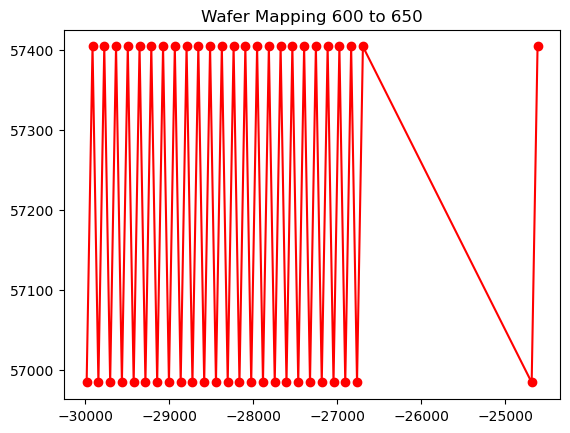

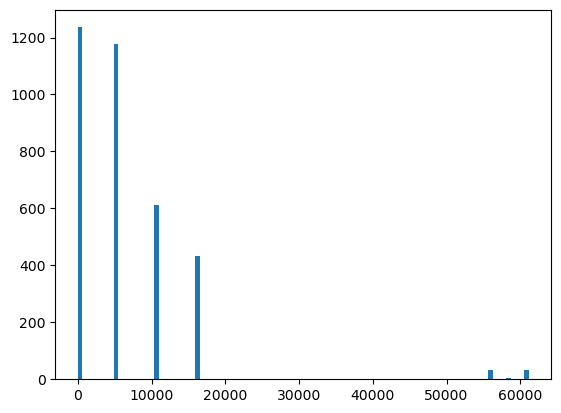

In [16]:
# goal 2 way1

data_goal2_way1 = data[['Group Section','Pad X center', 'Pad Y center','Pixel X center', 'Pixel Y center']]
data_g2w1 = np.array(data_goal2_way1).tolist()

# seperate the data by group section
group_A = []
group_B = []
group_C = []
for i in range(len(data_g2w1)):
    if data_g2w1[i][0] == 'A':
        group_A.append(data_g2w1[i])
    elif data_g2w1[i][0] == 'B':
        group_B.append(data_g2w1[i])
    elif data_g2w1[i][0] == 'C':
        group_C.append(data_g2w1[i])

#reorder the group A B C use sorted function
# for group A, sort by pad x increasing
group_A = sorted(group_A, key = lambda x: x[1])
# for group B, sort by pad y decreasing
group_B = sorted(group_B, key = lambda x: x[2], reverse=True)
# for group A, sort by pad x decreasing
group_C = sorted(group_C, key = lambda x: x[1], reverse=True)

reorder_data = group_A + group_B + group_C

#by for loop of 50 I find not all data is in a 50 group
for i in range(int(len(reorder_data)/50)+1):
    i = 12 #show the case for 600 - 650
    j = i+1

    pad_x_re = [row[1] for row in reorder_data][i*50:j*50]
    pad_y_re = [row[2] for row in reorder_data][i*50:j*50]
    
    plt.plot(pad_x_re,pad_y_re, 'ro-')
    plt.title(f'Wafer Mapping {i*50} to {j*50}')
    plt.show()
    break # only show one figure for now

"""Way1
get distance between pixel by don't separate the pad up and down, only along x increasing
"""
distance_goal2_way1 = []

def disOnlyX(reorder_data):
    # the function will return the distance between pixel from neighbor pad(only along x increasing)
    #print((reorder_data))
    for i in range(len(reorder_data)):
        if i+1 < len(reorder_data):
            pad_x_distance = reorder_data[i][3] - reorder_data[i+1][3]
            pad_y_distance = reorder_data[i][4] - reorder_data[i+1][4]
            
        elif i+1 == len(reorder_data):
            pad_x_distance = reorder_data[i][3] - reorder_data[0][3]
            pad_y_distance = reorder_data[i][4] - reorder_data[0][4]

        distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
        distance_goal2_way1.append(distance)

    num, bins, patches = plt.hist(distance_goal2_way1, bins=100)
    # bins = 120000 need 2m 51.1s to run

    path_filename = f'.\data\goal2 {len(bins)-1}bins '


    #create an array stored the value number per bin
    number_per_bin = []
    for i in range(len(patches)):
        if num[i] != 0:
            number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
                
    # Save data to CSV
    number_per_bin = np.array(number_per_bin)
    data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
    # the data for number_per_bin
    df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
    df.to_csv(f'{path_filename}.csv', index=False)


    plt.savefig(f'{path_filename}.png')  
    #plt.xscale('log')   
    plt.show()

    # print("We have ",len(distance_goal2_way1),
    #     " data \n max is: ",np.max(distance_goal2_way1),
    #     "\n min is: ",np.min(distance_goal2_way1))
    # print(np.unique(distance_goal2_way1))

disOnlyX(reorder_data)


In [18]:
# save reorder_data to a file
path_filename = '.\data\\reorder_data'
data_RG = np.column_stack((reorder_data))
df = pd.DataFrame(data_RG,columns=['Group Section','Pad X center', 'Pad Y center','Pixel X center', 'Pixel Y center'])
df.to_csv(f'{path_filename}.csv', index=False)



ValueError: Shape of passed values is (5, 3528), indices imply (5, 5)

In [ ]:
# try to seperate the data to see plot more clearly
# 15901 is decide by the histogram data above
dis_g2w1_less15901 = []
dis_g2w1_other = []
for i in range(len(distance_goal2_way1)):
    if distance_goal2_way1[i] < 15901:
        dis_g2w1_less15901.append(distance_goal2_way1[i])
    else:
        dis_g2w1_other.append(distance_goal2_way1[i])

fig, axs = plt.subplots(2,1)

axs[0].hist(dis_g2w1_less15901, bins=10)
axs[1].hist(dis_g2w1_other, bins=10)
plt.xscale('log')
plt.show()

In [ ]:
"""way 2
get distance between pixel by separate the pad up and down
"""

# goal 2 way2

data_goal2_way2 = data[['Grouptype','GroupIndex','Group Section',
                        'Pad X center', 'Pad Y center','Pixel X center', 'Pixel Y center']]
data_g2w2 = np.array(data_goal2_way2).tolist()

# seperate the data by group section
group_A = []
group_B = []
group_C = []



for i in range(len(data_g2w2)):
    #Group_Type = data_g2w2[i][0]
    #Group_Index = data_g2w2[i][1]
    Group_Section = data_g2w2[i][2]

    if Group_Section == 'A':
        group_A.append(data_g2w2[i])
    elif Group_Section == 'B':
        group_B.append(data_g2w2[i])
    elif Group_Section == 'C':
        group_C.append(data_g2w2[i])

#reorder the group A B C use sorted function
# for group A, sort by pad x increasing
group_A = sorted(group_A, key = lambda x: x[3])
# for group B, sort by pad y decreasing
group_B = sorted(group_B, key = lambda x: x[4], reverse=True)
# for group A, sort by pad x decreasing
group_C = sorted(group_C, key = lambda x: x[3], reverse=True)
 
reorder_data_w2 = group_A + group_B + group_C
reorder_data = 0 # free the memory
reorder_data = reorder_data_w2

#Index help: 
# Grouptype is 0; GroupIndex is 1; Group Section is 2; 
# Pad X center is 3; Pad Y center is 4; 
# Pixel X center is 5; Pixel Y center is 6

pad_distance = []
for i in range(len(reorder_data)):

    previous_Type = reorder_data[i][0]
    previous_Index = reorder_data[i][1]
    previous_group = reorder_data[i][2]

    if i+1 == len(reorder_data):
        # no need for the last data to first data
        #  because the distance is very large which is 111489.54008985765
        break    

    if reorder_data[i+1][0] != previous_Type:
        continue
    # if the group type change use continue to skip the distance calculation between diff group type

    if reorder_data[i+1][1] != previous_Index:
        continue
    # if the group index change ... skip ... diff group index
    
    if reorder_data[i+1][2] != previous_group:
        continue
    # if the group change ... skip ... diff group 

    # check the distance of pad(by x,y) for all value in group A
    if i+1 < len(reorder_data):
        dis = np.sqrt((reorder_data[i][3] - reorder_data[i+1][3])**2 + \
                      (reorder_data[i][4] - reorder_data[i+1][4])**2)
        
        pad_distance.append(dis)

#print(pad_distance)
#print(np.average(pad_distance))

num, bins, patches = plt.hist(pad_distance, bins=10)
plt.clf() # clear the plot no need show the plot

#create an array stored the value number per bin
number_per_bin = []
bin_value = [] #create a variable store the bins value

for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])    
        bin_value.append(bins[i])
        bin_value.append(bins[i+1])


#number_per_bin = np.array(number_per_bin)

#print(sum(num))# number of distance is 3456 which is correct (3456 + 6*12 = 3528)

#the next step is assume the histogram is known
# so second bin show that distance of neighbor pad is far away from each other
bin_value = np.unique(bin_value)
critical_pad_dis = int(bin_value[2]) 
#print("critical value is ",critical_pad_dis)

# for all reorder_data which distance is larger than critical_distance need look for a closer pad

# !!!copy from above code need function later!!!

#pad_distance = []
distance_goal2_way2 = []

for i in range(len(reorder_data)):

    previous_Type = reorder_data[i][0]
    previous_Index = reorder_data[i][1]
    previous_group = reorder_data[i][2]

    if i+1 == len(reorder_data):
        # no need for the last data to first data
        #  because the distance is very large which is 111489.54008985765
        break    

    if reorder_data[i+1][0] != previous_Type:
        continue
    # if the group type change use continue to skip the distance calculation between diff group type

    if reorder_data[i+1][1] != previous_Index:
        continue
    # if the group index change ... skip ... diff group index
    
    if reorder_data[i+1][2] != previous_group:
        continue
    # if the group change ... skip ... diff group 

    # check the distance of pad(by x,y) for all value in group A
    if i+1 < len(reorder_data):
        dis_pad = np.sqrt((reorder_data[i][3] - reorder_data[i+1][3])**2 + \
                      (reorder_data[i][4] - reorder_data[i+1][4])**2)
        
        dis_pixel = np.sqrt((reorder_data[i][5] - reorder_data[i+1][5])**2 + \
                        (reorder_data[i][6] - reorder_data[i+1][6])**2)
        
        if dis_pad > critical_pad_dis:

            if i+2 < len(reorder_data)                \
            and reorder_data[i+2][2] == previous_group\
            and reorder_data[i+2][1] == previous_Index\
            and reorder_data[i+2][0] == previous_Type: 
                
        # assume the one after the next is more close
                dis_pad_after_next = np.sqrt((reorder_data[i][3] - reorder_data[i+2][3])**2 + \
                            (reorder_data[i][4] - reorder_data[i+2][4])**2)
                
                if dis_pad_after_next > critical_pad_dis:
                    # is the case that the next pad is also far away
                    # which means the one after the next is set on different (up or donw) side
                    continue #skip this case

                else:
                    dis_pixel = np.sqrt((reorder_data[i][5] - reorder_data[i+2][5])**2 + \
                        (reorder_data[i][6] - reorder_data[i+2][6])**2)
                
            #else: #it more seems like no more else case?
            # #no more pad is closer
            #    frist try not do else to skip
                

                #pad_distance.append(dis_after_next)
    distance_goal2_way2.append(dis_pixel)

""" make sure the distance is all small then the critical_distance is correct
histogram of the the pad distance
num, bins, patches = plt.hist(pad_distance, bins=10)
plt.xscale("linear")
plt.show()

#create an array stored the value number per bin
number_per_bin = []

for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])    



number_per_bin = np.array(number_per_bin)
print(number_per_bin)
"""

#print(np.unique(distance_goal2_way2))

#goal2 way2 result output:
num, bins, patches = plt.hist(distance_goal2_way2, bins=3)
plt.xscale("linear")


#create an array stored the value number per bin
number_per_bin = []

for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])    
# end of for loop

path_filename = f'.\data\goal2 way2 {len(bins)-1}bins '
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)


plt.savefig(f'{path_filename}.png')  
#plt.xscale('log')   
plt.show()  

In [ ]:
# try to seperate the data to see plot more clearly for goal2 way2
# 531 is decide by the histogram data above
dis_g2w2_less531 = []
dis_g2w2_other = []

for i in range(len(distance_goal2_way2)):
    if distance_goal2_way2[i] < 531:
        dis_g2w2_less531.append(distance_goal2_way2[i])
    else:
        dis_g2w2_other.append(distance_goal2_way2[i])

fig, axs = plt.subplots(2,1)

axs[0].hist(dis_g2w2_less531, bins=10)
axs[1].hist(dis_g2w2_other, bins=10)

print("only zero???",np.unique(dis_g2w2_less531))

print("length of other",len(dis_g2w2_other)) 
#plt.xscale('linear')
plt.show()

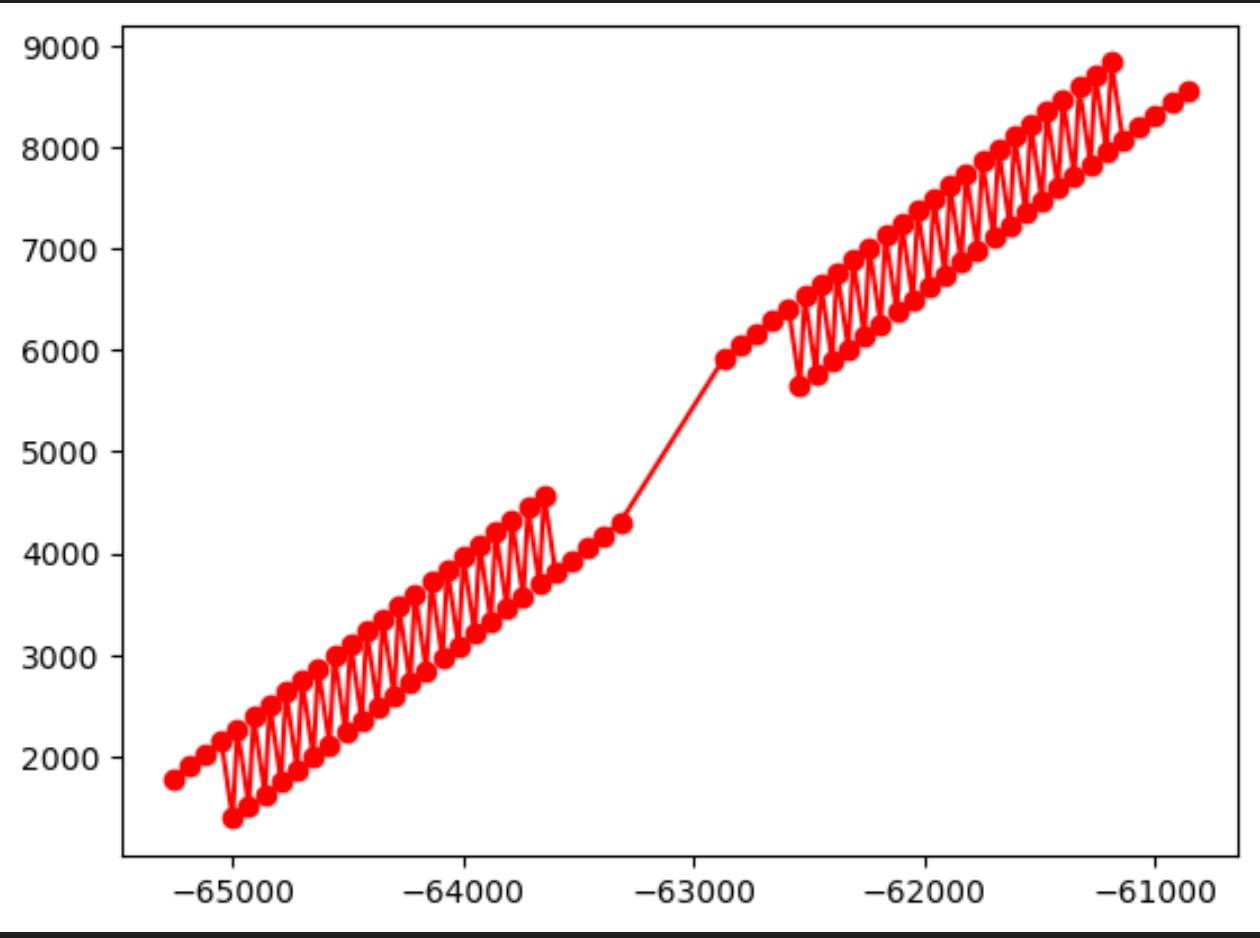
From the result above I think it is reasonable to say that each 50 data is in a close group based on pad position       
for one group it has two parts that is the close position       
Problem: So is it matter that we need treat one group as two?       
or because it is the place wires inport to the plane, as the wires will extend, so it's no need treat one group as two part?        

In [ ]:
""" this part of code is calculate the distance between pixel and pad
"""

#use the for loop for all pixel position to calculate the distance to the pad
# this wouldn't grouping the pixel at same positon 

distance = []

#distance = sqrt((x1-x2)^2 + (y1-y2)^2)
for i in range(len(data)):
    x_distance = pixel_x_center[i]-pad_x_center[i]
    y_distance = pixel_y_center[i]-pad_y_center[i]
    distance.append(np.sqrt(x_distance**2 + y_distance**2))


#show how many pixel we calculted the distance
print("We have ",len(distance),
      " data \n max is: ",np.max(distance),
      "\n min is: ",np.min(distance)) 

num, bins, patches = plt.hist(distance, bins=10)
plt.savefig(f'.\data\pixel to pad {len(bins)-1}bins data.png') 
#   bins =60000 need run 1min22sec

#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
        
    
    
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'.\data\pixel to pad {len(bins)-1}bins data.csv', index=False)


plt.show()

In [ ]:
"""test the goal1 by using the Pixel X center,Pixel Y center = (-1529.978,2650.000) point
    one point show x,y position of the wafer
    plot four wires(?) show the wafer to pad edge
    
May need use animation to show each wafer to pad edge
problem is the plot about pad position is not clear
"""
#pick out the test point (-1529.978,2650.000)
testPoint = [[],[]]



for i in range(len(data)):
    # sorry for the confusion when index is 0 is point (-1529.978,2650.000)
    if (data['Pixel X center'][i] == pixel_x_center[0]) and (data['Pixel Y center'][i] == pixel_y_center[0]):
        testPoint[0].append([data['Pad X center'][i]])
        testPoint[1].append([data['Pad Y center'][i]])
        

#print(testPoint)

plt.plot(testPoint[0],testPoint[1], 'ro')
plt.xscale('log') #???
plt.show()
